In [1]:
                     #Birla Institute of Technology  Science, Pilani Work-Integrated Learning Program Division
                                     # M.Tech (Data Science and Engineering)


Dataset Name: Heart Disease

Abstract: This dataset can be used to predict heart disease and it has been collected at a hospital over a period.


Problem Statement

Analyze the data set, investigate and evaluate the result and predict the overall performance


In [2]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df=pd.read_csv("Heart.csv")
#lets see insights of the data sets
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#checking the data types
print(df.info())
print("\n")
#checking the column values
print('Coulmns: ',df.columns)
print("\n")
#Checking the shape
print('Shape: ',df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Coulmns:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype

In [5]:
##Summary statistics
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [13]:
#Observation
#There are total 918 rows and 12 columns
#Out of 12 
    #1) There are no null values in our data set
    #2)  6 columns are catagorical values and 6 are contunies values
    #3) looks like most of the contunies variable values are normally distributed since mean and median are almost same in these variables
    #4) Target variable is heart disease column which is a binarry variable
    #5) In few of the columns margin between 75th percentile and max is high so chances of outliers are more

M    725
F    193
Name: Sex, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


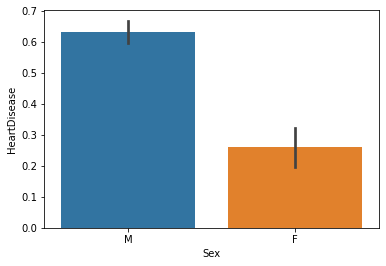

In [25]:
#Checking the catagorical variables to encode them
y =df["HeartDisease"]
print(df.Sex.value_counts())
print(sns.barplot(df["Sex"],y))

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


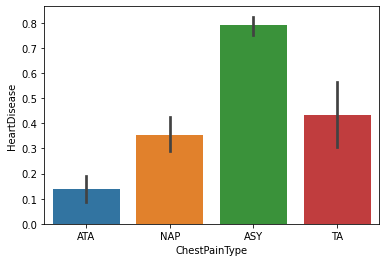

In [26]:
print(df.ChestPainType.value_counts())
print(sns.barplot(df["ChestPainType"],y))

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


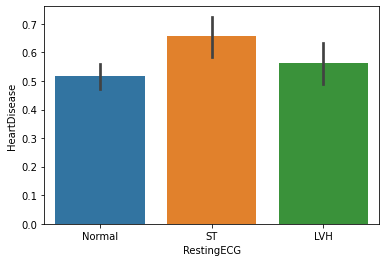

In [27]:
print(df.RestingECG.value_counts())
print(sns.barplot(df["RestingECG"],y))

N    547
Y    371
Name: ExerciseAngina, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


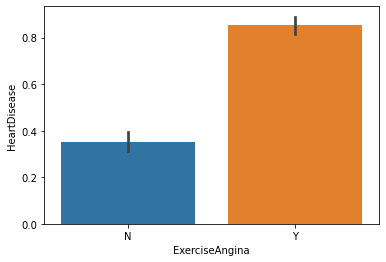

In [28]:
print(df.ExerciseAngina.value_counts())
print(sns.barplot(df["ExerciseAngina"],y))

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


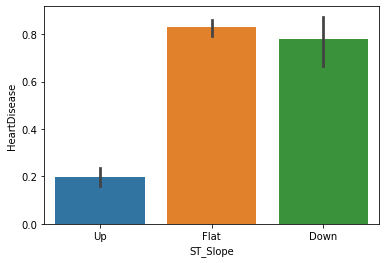

In [29]:
print(df.ST_Slope.value_counts())
print(sns.barplot(df["ST_Slope"],y))

In [ ]:
#Above we are checking the percenatge of catagorical variables with respect to target variable
#observation
#Sex: Number of male is more
#ChestPainType:number of counts ASY is highest and TA is lowest. But ATA is lowest for Heart Disease present
#RestingECG: Normal is higest 
#ExerciseAngina: chances of heart Disease is more if Exercise Angina is present
#ST_Slope: If the slope is down chances of heart disease is less

In [31]:
#Transforming the catagorical data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['Sex','ChestPainType', 'RestingECG',"ExerciseAngina" , "ST_Slope"]
for i in variable:
    df[i] = lb.fit_transform(df[i])
    
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Checking correlation between columns

<AxesSubplot:>

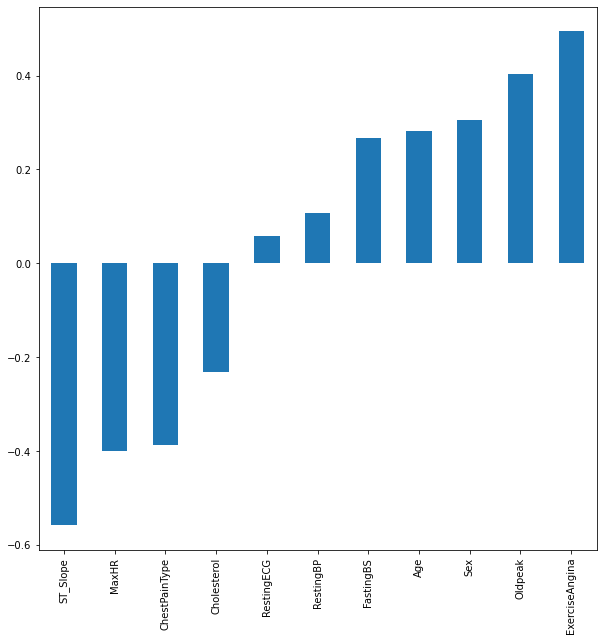

In [32]:
#checking the correlation
#checking the correlation
plt.figure(figsize=(10,10))
df.corr()['HeartDisease'].sort_values().drop('HeartDisease').plot(kind='bar')

In [33]:
#Observation
#Above plot shows corelation of all the varaibles with respect to target variable I:e heart desease
#ST_Slope and Excersie angina are highly corelated and hence these two are most impottant features
#Resting ECG is verry less corelated hence it is least important feature

Data Cleaning

Age                  AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Sex               AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
ChestPainType     AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
RestingBP         AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Cholesterol       AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
FastingBS         AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
RestingECG        AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
MaxHR             AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
ExerciseAngina       AxesSubplot(0.125,0.391471;0.0824468x0.222059)
Oldpeak           AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
ST_Slope          AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
HeartDisease      AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
dtype: object

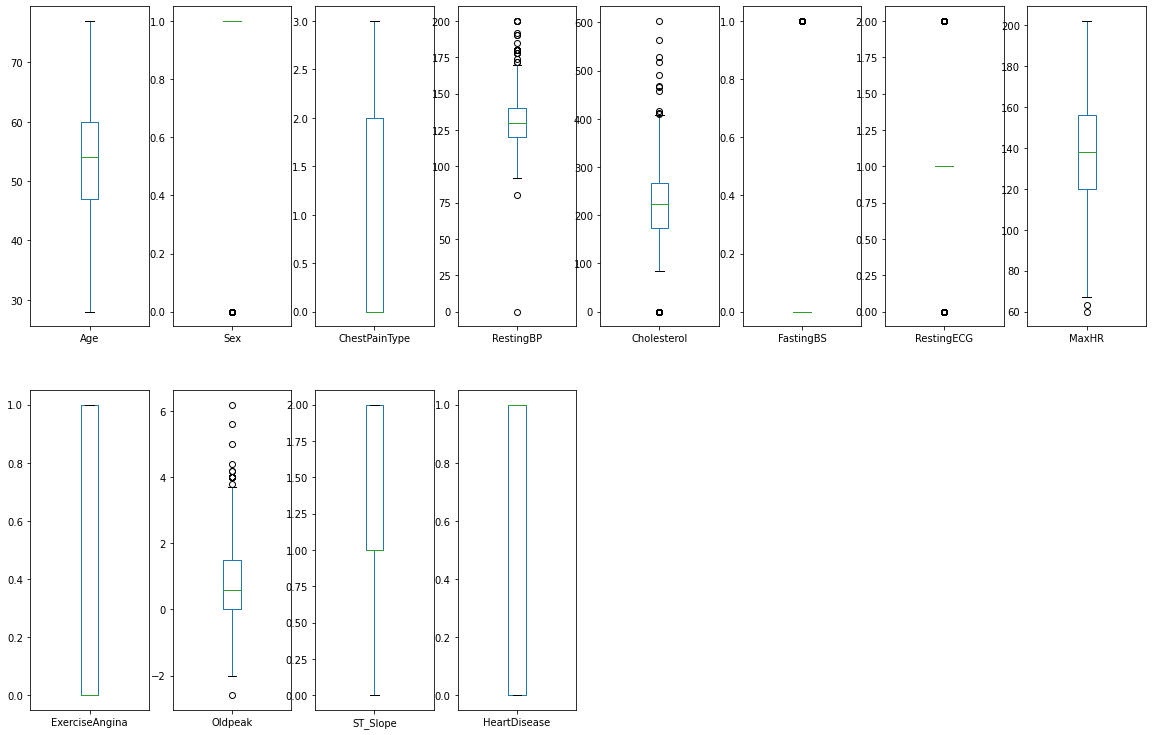

In [34]:
#Identifyng the outlier
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(3,8),figsize=(20,20))

In [35]:
#Observtion
#RestingBP, Cholestrol , Oldpeak have some outlier values

In [37]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((918-899)/918)*100

print("Using z score percentage of outliers removed:",percentage_ofouliers)

(918, 12)
(899, 12)
using z score percentage of outliers removed: 2.0697167755991286


In [39]:
# About 19 rows of outlier data has been removed

Data transformation

In [41]:
#Checking the skewness
df_new.skew()

Age              -0.183472
Sex              -1.424634
ChestPainType     0.784393
RestingBP         0.390786
Cholesterol      -0.746112
FastingBS         1.268741
RestingECG        0.006721
MaxHR            -0.122104
ExerciseAngina    0.392858
Oldpeak           0.849256
ST_Slope         -0.383890
HeartDisease     -0.190268
dtype: float64

In [48]:
#splitting the values to x and y variable
x=df_new.drop(labels="HeartDisease",axis=1)
y=df_new["HeartDisease"]

In [56]:
#removing the skewness of x variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(x))
x.skew()

MinMaxScaler()


Age              -0.040823
Sex              -1.424634
ChestPainType     0.282935
RestingBP        -0.000027
Cholesterol      -1.068732
FastingBS         1.268741
RestingECG       -0.065326
MaxHR            -0.043995
ExerciseAngina    0.392858
Oldpeak          -0.212219
ST_Slope         -0.154680
dtype: float64

In [58]:
#Skewness is reduced using Min max normalization

Model fitting

In [86]:
#model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [101]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max Accuracy is {} with best random state {}".format(max_score,max_state))

In [102]:
model_select(SVC)

Max Accuracy is 0.92 with best random state 65




classificationreport               precision    recall  f1-score   support

           0       0.91      0.87      0.89        85
           1       0.92      0.95      0.94       140

    accuracy                           0.92       225
   macro avg       0.92      0.91      0.91       225
weighted avg       0.92      0.92      0.92       225

accuracy score 0.92


<AxesSubplot:>

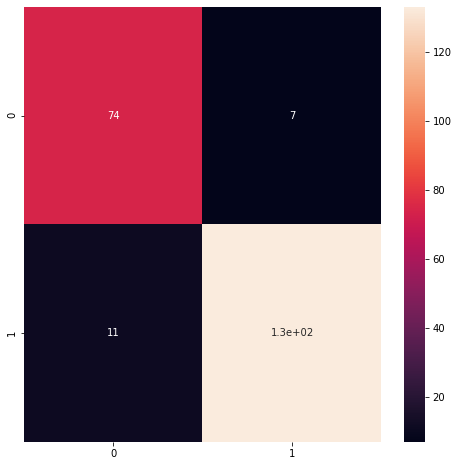

In [103]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=65)
svc=SVC().fit(x_train, y_train)
pred_lg = svc.predict(x_test)
print("\n")
print("classificationreport", classification_report(y_test,pred_lg))
print("accuracy score",accuracy_score(y_test,pred_lg))
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_lg, y_test), annot=True)

In [104]:
#Observation from SVC
# we have got 92 accuacry with best random state of 65
#And the classification matrix is shown above

In [105]:
model_select(LogisticRegression)

Max Accuracy is 0.9066666666666666 with best random state 93




classificationreport               precision    recall  f1-score   support

           0       0.89      0.92      0.91       110
           1       0.92      0.90      0.91       115

    accuracy                           0.91       225
   macro avg       0.91      0.91      0.91       225
weighted avg       0.91      0.91      0.91       225

accuracy score 0.9066666666666666


<AxesSubplot:>

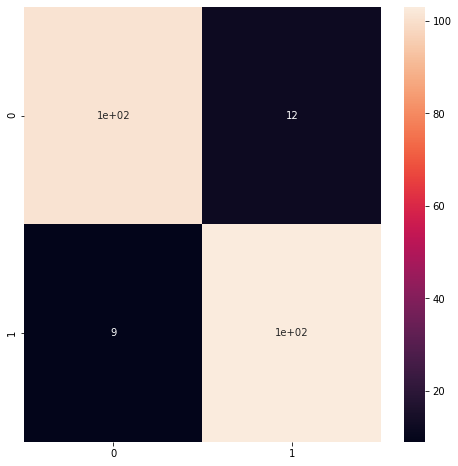

In [106]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=93)
lg=LogisticRegression().fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("\n")
print("classificationreport", classification_report(y_test,pred_lg))
print("accuracy score",accuracy_score(y_test,pred_lg))
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_lg, y_test), annot=True)

In [107]:
#Observation from logistic regression
# we have got 90 accuacry with best random state of 93
#And the classification matrix is shown above

In [108]:
model_select(KNeighborsClassifier)

Max Accuracy is 0.9111111111111111 with best random state 97




classificationreport               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.92      0.90      0.91       115

    accuracy                           0.91       225
   macro avg       0.91      0.91      0.91       225
weighted avg       0.91      0.91      0.91       225

accuracy score 0.9111111111111111


<AxesSubplot:>

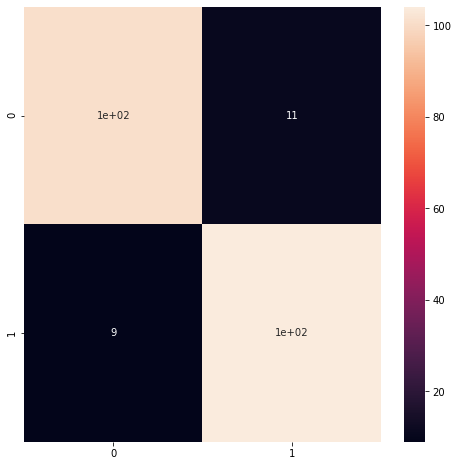

In [109]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=97)
kn=KNeighborsClassifier().fit(x_train, y_train)
pred_lg = kn.predict(x_test)
print("\n")
print("classificationreport", classification_report(y_test,pred_lg))
print("accuracy score",accuracy_score(y_test,pred_lg))
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_lg, y_test), annot=True)

In [110]:
#Observation from KNeighbors Classifier
# we have got 91 accuacry with best random state of 97
#And the classification matrix is shown above

In [111]:
model_select(DecisionTreeClassifier)

Max Accuracy is 0.8533333333333334 with best random state 102




classificationreport               precision    recall  f1-score   support

           0       0.81      0.82      0.82       106
           1       0.84      0.83      0.84       119

    accuracy                           0.83       225
   macro avg       0.83      0.83      0.83       225
weighted avg       0.83      0.83      0.83       225

accuracy score 0.8266666666666667


<AxesSubplot:>

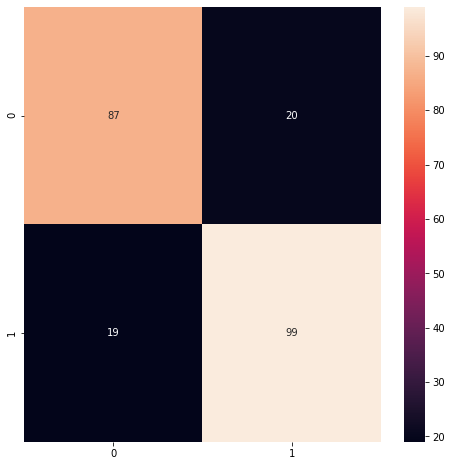

In [112]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=102)
dt=DecisionTreeClassifier().fit(x_train, y_train)
pred_lg = dt.predict(x_test)
print("\n")
print("classificationreport", classification_report(y_test,pred_lg))
print("accuracy score",accuracy_score(y_test,pred_lg))
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_lg, y_test), annot=True)

In [ ]:
#Observation from DecisionTree Classifier
# we have got 85 accuacry with best random state of 102
#And the classification matrix is shown above

In [115]:
model_select(RandomForestClassifier)

Max Accuracy is 0.92 with best random state 93




classificationreport               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.91      0.93      0.92       115

    accuracy                           0.92       225
   macro avg       0.92      0.92      0.92       225
weighted avg       0.92      0.92      0.92       225

accuracy score 0.92


<AxesSubplot:>

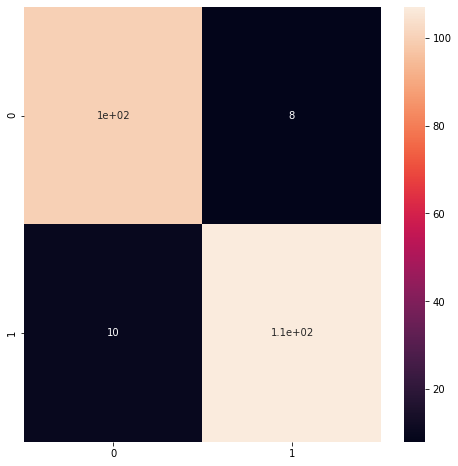

In [116]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=93)
rf=RandomForestClassifier().fit(x_train, y_train)
pred_lg = rf.predict(x_test)
print("\n")
print("classificationreport", classification_report(y_test,pred_lg))
print("accuracy score",accuracy_score(y_test,pred_lg))
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_lg, y_test), annot=True)

In [117]:
#Observation from RandomForest Classifier
# we have got 92 accuacry with best random state of 93
#And the classification matrix is shown above

In [118]:
#now we can find the predict the Heart desiese based on the attribute values with about 92% accuracy